<a href="https://colab.research.google.com/github/SAIGANESH02/Wine_Quality_Prediction/blob/main/WineQualityCombined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [ ]:
!pip install tensorflow==2.0.0alpha

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv("winequality-white.csv")
df2 = pd.read_csv("winequality-red.csv")

In [ ]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df1.shape

(4898, 12)

In [ ]:
df1['r/w'] = pd.DataFrame(np.zeros((4898, 1)))
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,r/w
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0


In [ ]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df2.shape

(1599, 12)

In [ ]:
df2['r/w'] = pd.DataFrame(np.ones((4898, 1)))
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,r/w
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.0


In [ ]:
frames = [df1,df2]
df = pd.concat(frames)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,r/w
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,r/w
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [ ]:
# Train test split

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)

In [ ]:
train.shape

(4547, 13)

In [ ]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,r/w
2349,7.9,0.46,0.40,10.1,0.168,19.0,184.0,0.99782,3.06,0.62,9.5,5,0.0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0.0
1003,6.8,0.36,0.32,1.8,0.067,4.0,8.0,0.99280,3.36,0.55,12.8,7,1.0
1098,6.5,0.29,0.25,10.6,0.039,32.0,120.0,0.99620,3.31,0.34,10.1,6,0.0
644,6.4,0.24,0.29,11.4,0.051,32.0,166.0,0.99680,3.31,0.45,9.5,5,0.0


In [ ]:
test.shape

(1950, 13)

In [ ]:
# Normalize the data. Extremely Important
train_x = train.drop('quality', axis=1)
train_y = train['quality']
train_x=(train_x-train_x.min())/(train_x.max()-train_x.min())

test_x = test.drop('quality', axis=1)
test_y = test['quality']
test_x=(test_x-test_x.min())/(test_x.max()-test_x.min())

In [ ]:
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,r/w
2349,0.338843,0.304,0.240964,0.306452,0.264120,0.062500,0.410138,0.461372,0.221311,0.227273,0.217391,0.0
4897,0.181818,0.104,0.228916,0.006452,0.018272,0.072917,0.211982,0.098403,0.385246,0.056818,0.550725,0.0
1003,0.247934,0.224,0.192771,0.038710,0.096346,0.010417,0.004608,0.244713,0.467213,0.187500,0.695652,1.0
1098,0.223140,0.168,0.150602,0.322581,0.049834,0.107639,0.262673,0.391454,0.426230,0.068182,0.304348,0.0
644,0.214876,0.128,0.174699,0.348387,0.069767,0.107639,0.368664,0.417350,0.426230,0.130682,0.217391,0.0


In [ ]:
train_y.head()

2349    5
4897    6
1003    7
1098    6
644     5
Name: quality, dtype: int64

In [ ]:
train_y.max()

9

In [ ]:
train_y.min()

3

In [ ]:
no_features = train_x.shape[1]
no_features

12

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=[no_features]),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [ ]:
model.compile(optimizer='adam',loss=['mse'], 
              metrics=['mae'])

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['loss'] < 0.35:
            print("MSE less than 0.35. No futher training required. Otherwise \
                  data will overfit")
            self.model.stop_training = True

In [ ]:
callbacks = MyCallback()

In [ ]:
history = model.fit(train_x, train_y, epochs=500, callbacks=[callbacks])

Epoch 1/500
143/143 [==============================] - 2s 2ms/step - loss: 12.5059 - mae: 2.8155
Epoch 2/500
143/143 [==============================] - 0s 2ms/step - loss: 0.7553 - mae: 0.6762
Epoch 3/500
143/143 [==============================] - 0s 2ms/step - loss: 0.7310 - mae: 0.6628
Epoch 4/500
143/143 [==============================] - 0s 2ms/step - loss: 0.6656 - mae: 0.6312
Epoch 5/500
143/143 [==============================] - 0s 2ms/step - loss: 0.6366 - mae: 0.6162
Epoch 6/500
143/143 [==============================] - 0s 2ms/step - loss: 0.5771 - mae: 0.5799
Epoch 7/500
143/143 [==============================] - 0s 2ms/step - loss: 0.5710 - mae: 0.5794
Epoch 8/500
143/143 [==============================] - 0s 2ms/step - loss: 0.5732 - mae: 0.5902
Epoch 9/500
143/143 [==============================] - 0s 2ms/step - loss: 0.5581 - mae: 0.5804
Epoch 10/500
143/143 [==============================] - 0s 2ms/step - loss: 0.5508 - mae: 0.5694
Epoch 11/500
143/143 [================

Text(0.5, 0, 'Epochs')

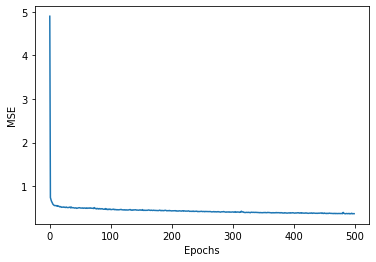

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

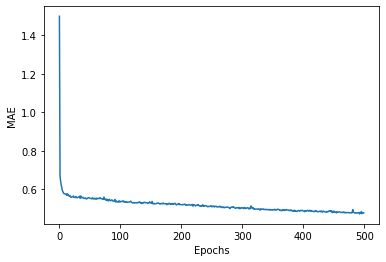

In [ ]:
plt.plot(history.epoch, history.history['mae'])
plt.ylabel('MAE')
plt.xlabel('Epochs')

In [ ]:
test_mse, test_mae = model.evaluate(test_x, test_y)

61/61 [==============================] - 0s 1ms/step - loss: 1.2320 - mae: 0.9143


In [ ]:
test_mse

1.2320139408111572

In [ ]:
test_mae

0.9142628312110901

In [ ]:
train.to_csv('combined_wine_train_data.csv',index=None)

In [ ]:
test.to_csv('combined_wine_test_data.csv',index=None)

In [ ]:
tf.saved_model.save(model, 'combined_wine_saved_model')